In [1]:
import pandas as pd
import numpy as np
import pickle
import json
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
config = {
          "loc1" : {"city" : "blr", "vals" : [10,20,30]},
          "loc2" : {"city" : "chn", "vals" : [40,50,60]}
         }

1) pickle the Dictionary -  store the dict in a file

In [3]:
with open('config.pkl', 'wb') as fw:
    pickle.dump(config, fw)

2) unpickle the data     -  read the file

In [4]:
with open('config.pkl', 'rb') as fr:
    read_dict = pickle.load(fr)
read_dict

{'loc1': {'city': 'blr', 'vals': [10, 20, 30]},
 'loc2': {'city': 'chn', 'vals': [40, 50, 60]}}

3) encode the dict as json - store the dict in a file

In [5]:
with open('config.json','w') as fw:
    json.dump(config,fw)

4) decode the data         - read the file

In [6]:
with open('config.json', 'r') as fr:
    read_json_dict = json.load(fr)
read_json_dict

{'loc1': {'city': 'blr', 'vals': [10, 20, 30]},
 'loc2': {'city': 'chn', 'vals': [40, 50, 60]}}

In [7]:
df_pkl = pd.DataFrame(read_dict)
df_pkl

,loc1,loc2
city,blr,chn
vals,"[10, 20, 30]","[40, 50, 60]"


In [8]:
df_json = pd.DataFrame(read_json_dict)
df_json

,loc1,loc2
city,blr,chn
vals,"[10, 20, 30]","[40, 50, 60]"


In [9]:
f1 = open("datas.csv", "w")

f1.write('''name,dept,salary,bonus
arun,SALES,18000,18500
john,accts,16000,10500
ravi,purch,20000,
manu,hrd,19000,?
elan,hrd,,11000
somu,Sales,12000,10500
raja,sales,?,19000
vani,sales,21000,21500
guru,HRD,15000,
kala,HRD,15000,2000
yash,accts,18500,19000
pavan,sales,21000,21500
rinu,Accts,,2000
elan,purch,15000,2000
tara,accts,18500,3230
ullas,purch,15000,2000
manav,hrd,,
amar,sales,18000,3500
giri,Accts,21000,3000''')
f1.close()

In [10]:
df2 = pd.read_csv('datas.csv')
df2

,name,dept,salary,bonus
0,arun,SALES,18000,18500
1,john,accts,16000,10500
2,ravi,purch,20000,NaN
3,manu,hrd,19000,?
4,elan,hrd,NaN,11000
5,somu,Sales,12000,10500
6,raja,sales,?,19000
7,vani,sales,21000,21500
8,guru,HRD,15000,NaN
9,kala,HRD,15000,2000


1) clean the data 

In [11]:
df2.replace('?',np.nan,inplace = True)
df2

,name,dept,salary,bonus
0,arun,SALES,18000,18500
1,john,accts,16000,10500
2,ravi,purch,20000,NaN
3,manu,hrd,19000,NaN
4,elan,hrd,NaN,11000
5,somu,Sales,12000,10500
6,raja,sales,NaN,19000
7,vani,sales,21000,21500
8,guru,HRD,15000,NaN
9,kala,HRD,15000,2000


In [12]:
df2[['salary','bonus']] = df2[['salary','bonus']].astype(float)

In [13]:
df2['salary'].fillna(df2['salary'].median(),inplace= True)
df2['bonus'].fillna(df2['bonus'].median(),inplace= True)
df2

,name,dept,salary,bonus
0,arun,SALES,18000.0,18500.0
1,john,accts,16000.0,10500.0
2,ravi,purch,20000.0,10500.0
3,manu,hrd,19000.0,10500.0
4,elan,hrd,18000.0,11000.0
5,somu,Sales,12000.0,10500.0
6,raja,sales,18000.0,19000.0
7,vani,sales,21000.0,21500.0
8,guru,HRD,15000.0,10500.0
9,kala,HRD,15000.0,2000.0


In [14]:
df2['dept'] = df2['dept'].str.lower()
df2['name'] = df2['name'].str[0].str.upper() + df2['name'].str[1:] 
df2

,name,dept,salary,bonus
0,Arun,sales,18000.0,18500.0
1,John,accts,16000.0,10500.0
2,Ravi,purch,20000.0,10500.0
3,Manu,hrd,19000.0,10500.0
4,Elan,hrd,18000.0,11000.0
5,Somu,sales,12000.0,10500.0
6,Raja,sales,18000.0,19000.0
7,Vani,sales,21000.0,21500.0
8,Guru,hrd,15000.0,10500.0
9,Kala,hrd,15000.0,2000.0


2) create new column "netpay"  = salary + bonus

In [15]:
df2['netpay'] = df2['salary'] + df2['bonus']
df2.head()

,name,dept,salary,bonus,netpay
0,Arun,sales,18000.0,18500.0,36500.0
1,John,accts,16000.0,10500.0,26500.0
2,Ravi,purch,20000.0,10500.0,30500.0
3,Manu,hrd,19000.0,10500.0,29500.0
4,Elan,hrd,18000.0,11000.0,29000.0


3) create new column "band"    = netpay>25000   "A"
                                                "B"

In [16]:
df2['band'] = np.where(df2['netpay'] > 25000, 'A','B')
df2.head(6)

,name,dept,salary,bonus,netpay,band
0,Arun,sales,18000.0,18500.0,36500.0,A
1,John,accts,16000.0,10500.0,26500.0,A
2,Ravi,purch,20000.0,10500.0,30500.0,A
3,Manu,hrd,19000.0,10500.0,29500.0,A
4,Elan,hrd,18000.0,11000.0,29000.0,A
5,Somu,sales,12000.0,10500.0,22500.0,B


In [17]:
cnt = df2.groupby('band').count()
cnt.columns
cnt['count'] = cnt['name']
cnt

,name,dept,salary,bonus,netpay,count
band,,,,,,
A,11,11,11,11,11,11
B,8,8,8,8,8,8


In [18]:
cnt = cnt['count']
cnt

band
A    11
B     8
Name: count, dtype: int64

5) use the graph to display the data how many emps are    
   there in each BAND 

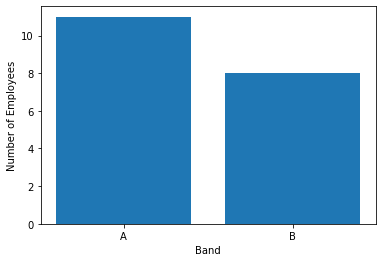

In [19]:
plt.bar(cnt.index,cnt)
plt.ylabel('Number of Employees')
plt.xlabel('Band')
plt.show()

6) display a graph to display how are emps distributed based on the dept ?

In [20]:
df2.head(3)

,name,dept,salary,bonus,netpay,band
0,Arun,sales,18000.0,18500.0,36500.0,A
1,John,accts,16000.0,10500.0,26500.0,A
2,Ravi,purch,20000.0,10500.0,30500.0,A


In [21]:
emp_by_dept = df2.groupby('dept').size()
emp_by_dept

dept
accts    5
hrd      5
purch    3
sales    6
dtype: int64

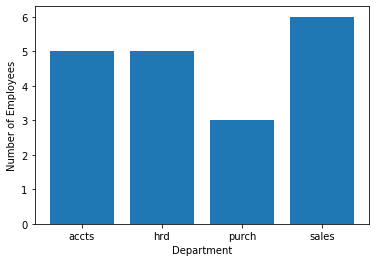

In [22]:
plt.bar(emp_by_dept.index,emp_by_dept)
plt.ylabel('Number of Employees')
plt.xlabel('Department')
plt.show()

In [23]:
data1 = {
    'name': ['Arun', 'John', 'Ravi'],
    'dept': ['sales', 'accts', 'purch'],
    'salary': [18000.0, 16000.0, 20000.0]}

data2 ={'dept': ['sales', 'accts', 'purch'],
    'dept_manager': ['Suresh', 'Ravi', 'Anil']}
df3_1 = pd.DataFrame(data1)
df3_2  = pd.DataFrame(data2)
print(df3_1)
print()
print(df3_2)

   name   dept   salary
0  Arun  sales  18000.0
1  John  accts  16000.0
2  Ravi  purch  20000.0

    dept dept_manager
0  sales       Suresh
1  accts         Ravi
2  purch         Anil


1) how to merge data frames = ? 

In [24]:
df3_merge = pd.merge(df3_1,df3_2, on = 'dept')
df3_merge

,name,dept,salary,dept_manager
0,Arun,sales,18000.0,Suresh
1,John,accts,16000.0,Ravi
2,Ravi,purch,20000.0,Anil


2) how to join data frames  = ?

In [25]:
help(df3_1.join)

Help on method join in module pandas.core.frame:

join(other: 'DataFrame | Series', on: 'IndexLabel | None' = None, how: 'str' = 'left', lsuffix: 'str' = '', rsuffix: 'str' = '', sort: 'bool' = False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Join columns of another DataFrame.
    
    Join columns with `other` DataFrame either on index or on a key
    column. Efficiently join multiple DataFrame objects by index at once by
    passing a list.
    
    Parameters
    ----------
    other : DataFrame, Series, or list of DataFrame
        Index should be similar to one of the columns in this one. If a
        Series is passed, its name attribute must be set, and that will be
        used as the column name in the resulting joined DataFrame.
    on : str, list of str, or array-like, optional
        Column or index level name(s) in the caller to join on the index
        in `other`, otherwise joins index-on-index. If multiple
        values given, the `other` DataFr

In [26]:
df3_join = df3_1.join(df3_2,lsuffix='_left', rsuffix='_right')
df3_join

,name,dept_left,salary,dept_right,dept_manager
0,Arun,sales,18000.0,sales,Suresh
1,John,accts,16000.0,accts,Ravi
2,Ravi,purch,20000.0,purch,Anil


In [27]:
df3_concat = pd.concat([df3_1,df3_2['dept_manager']],axis = 'columns')
df3_concat

,name,dept,salary,dept_manager
0,Arun,sales,18000.0,Suresh
1,John,accts,16000.0,Ravi
2,Ravi,purch,20000.0,Anil


In [28]:
df4 = pd.read_csv('data4.csv')
df4

,name,dept,loc,date_join
0,mahesh,sales,blr,12-jan-2020
1,harish,purch,mum,15-mar-2023
2,ramesh,sales,chn,31-dec-2021
3,suresh,accts,hyd,05-feb-2022
4,parash,finan,del,20-oct-2019
5,mukesh,accts,gur,17-jul-2021
6,rakesh,sales,noi,01-may-2022
7,umeesh,finan,blr,10-nov-2019
8,rajesh,sales,chn,11-sep-2020
9,ganesh,accts,blr,22-aug-2018


In [29]:
type(df4.loc[0,'date_join'])

str

In [30]:
df4['date_join'] = pd.to_datetime(df4['date_join'])

In [31]:
type(df4.loc[0,'date_join'])

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       10 non-null     object        
 1   dept       10 non-null     object        
 2   loc        10 non-null     object        
 3   date_join  10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 448.0+ bytes


In [33]:
cur_year = datetime.datetime.now().year

In [34]:
res4 = df4.copy()
res4 = res4[['name','date_join']]
res4['no_years_of_experience'] = cur_year - df4['date_join'].dt.year
res4

,name,date_join,no_years_of_experience
0,mahesh,2020-01-12,4
1,harish,2023-03-15,1
2,ramesh,2021-12-31,3
3,suresh,2022-02-05,2
4,parash,2019-10-20,5
5,mukesh,2021-07-17,3
6,rakesh,2022-05-01,2
7,umeesh,2019-11-10,5
8,rajesh,2020-09-11,4
9,ganesh,2018-08-22,6


In [35]:
df5 = pd.read_csv('emp.csv')
df5

,code,name,dept,salary
0,1001,manu,sales,15000
1,1002,hari,purch,25000
2,1003,john,sales,18000
3,1004,amar,purch,24000
4,1005,yash,sales,15000
5,1006,guru,sales,21000
6,1007,elan,accts,18000
7,1008,ramu,accts,17000
8,1009,tara,sales,17500
9,1010,lala,purch,19000


In [36]:
df5_sales = df5.copy()
df5_sales['dept'] = np.where(df5['dept'] == 'sales',df5['dept'],np.nan)
df5_sales.dropna(inplace = True)
df5_sales.reset_index(drop= True)
df5_sales.to_csv('sales.csv',index = False)
df5_sales 

,code,name,dept,salary
0,1001,manu,sales,15000
2,1003,john,sales,18000
4,1005,yash,sales,15000
5,1006,guru,sales,21000
8,1009,tara,sales,17500


In [37]:
df5_accts = df5.copy()
df5_accts['dept'] = np.where(df5['dept'] == 'accts',df5['dept'],np.nan)
df5_accts.dropna(inplace = True)
df5_accts.reset_index(drop= True)
df5_accts.to_csv('accts.csv',index = False)
df5_accts

,code,name,dept,salary
6,1007,elan,accts,18000
7,1008,ramu,accts,17000


In [38]:
df5_purch = df5.copy()
df5_purch['dept'] = np.where(df5['dept'] == 'purch',df5['dept'],np.nan)
df5_purch.dropna(inplace = True)
df5_purch.reset_index(drop= True)
df5_purch.to_csv('purch.csv',index = False)
df5_purch

,code,name,dept,salary
1,1002,hari,purch,25000
3,1004,amar,purch,24000
9,1010,lala,purch,19000


In [39]:
df5_inc = df5.copy()
df5_inc.loc[df5['dept'] == 'sales','salary'] + 5000
df5_inc

,code,name,dept,salary
0,1001,manu,sales,15000
1,1002,hari,purch,25000
2,1003,john,sales,18000
3,1004,amar,purch,24000
4,1005,yash,sales,15000
5,1006,guru,sales,21000
6,1007,elan,accts,18000
7,1008,ramu,accts,17000
8,1009,tara,sales,17500
9,1010,lala,purch,19000


In [40]:
df6_1 = pd.read_csv('data1.csv', sep = '-')
df6_1

,empid,name,dept
0,1001,ravi,sales
1,1002,hari,accts
2,1003,john,purch
3,1004,manu,finan
4,1005,kunal,devops


In [41]:
df6_2 = pd.read_csv('data2.csv')
df6_2

,code,city
0,1001,blr
1,1002,chn
2,1004,hyd
3,1008,mum


In [42]:
res6 = pd.merge(df6_1,df6_2,left_on = 'empid',right_on='code',how = 'inner')
res6.drop(columns = 'code',inplace = True)
res6

,empid,name,dept,city
0,1001,ravi,sales,blr
1,1002,hari,accts,chn
2,1004,manu,finan,hyd


In [43]:
df7 = pd.read_csv('data1.csv', sep = '-')
df7

,empid,name,dept
0,1001,ravi,sales
1,1002,hari,accts
2,1003,john,purch
3,1004,manu,finan
4,1005,kunal,devops


In [44]:
df7.to_parquet('data1.parquet')

In [45]:
df7.to_feather('data1.feather')

In [46]:
df7.to_json('data1.json')

In [47]:
df7p = pd.read_parquet('data1.parquet')
df7p

,empid,name,dept
0,1001,ravi,sales
1,1002,hari,accts
2,1003,john,purch
3,1004,manu,finan
4,1005,kunal,devops


In [48]:
df7f = pd.read_feather('data1.feather')
df7f

,empid,name,dept
0,1001,ravi,sales
1,1002,hari,accts
2,1003,john,purch
3,1004,manu,finan
4,1005,kunal,devops


In [49]:
df7j = pd.read_json('data1.json')
df7j

,empid,name,dept
0,1001,ravi,sales
1,1002,hari,accts
2,1003,john,purch
3,1004,manu,finan
4,1005,kunal,devops


In [50]:
df8 = pd.read_csv('data8.csv')
df8

,name,got,exp
0,t1,10,20
1,t2,10,10
2,t3,15,20
3,t4,12,12
4,t5,30,30
5,t6,32,32
6,t7,20,20
7,t8,*,NaN
8,t9,10,NaN
9,t10,11,11


In [51]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    16 non-null     object
 1   got     16 non-null     object
 2   exp     14 non-null     object
dtypes: object(3)
memory usage: 512.0+ bytes


In [52]:
df8_clean = df8.replace(['*','?', 'hai'], np.nan)
df8_clean

,name,got,exp
0,t1,10,20
1,t2,10,10
2,t3,15,20
3,t4,12,12
4,t5,30,30
5,t6,32,32
6,t7,20,20
7,t8,NaN,NaN
8,t9,10,NaN
9,t10,11,11


In [53]:
df8_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    16 non-null     object
 1   got     13 non-null     object
 2   exp     13 non-null     object
dtypes: object(3)
memory usage: 512.0+ bytes


In [54]:
df8_clean['got'].fillna(df8_clean['got'].median(), inplace = True)
df8_clean['exp'].fillna(df8_clean['exp'].median(), inplace = True)
df8_clean

,name,got,exp
0,t1,10,20
1,t2,10,10
2,t3,15,20
3,t4,12,12
4,t5,30,30
5,t6,32,32
6,t7,20,20
7,t8,11.0,20.0
8,t9,10,20.0
9,t10,11,11


In [55]:
df8_clean[['got','exp']] = df8_clean[['got','exp']].astype(int)
df8_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    16 non-null     object
 1   got     16 non-null     int32 
 2   exp     16 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 384.0+ bytes


In [56]:
df8_clean['status'] = np.where(df8_clean['got'] == df8_clean['exp'], "PASS", 'FAIL')
df8_clean

,name,got,exp,status
0,t1,10,20,FAIL
1,t2,10,10,PASS
2,t3,15,20,FAIL
3,t4,12,12,PASS
4,t5,30,30,PASS
5,t6,32,32,PASS
6,t7,20,20,PASS
7,t8,11,20,FAIL
8,t9,10,20,FAIL
9,t10,11,11,PASS


In [57]:
with open('data.txt', 'r') as fr:
    data = fr.readlines()

In [58]:
data

['how is this name=ravi and then later marks= [10 20 30]\n',
 'name= manu hello world of marks=[40 50 60] then also data\n',
 'data is find name= hari marks= [70 80 90] from then that\n',
 'this is how data name= guru of then this marks= [25 35 45]']

In [59]:
names = [elem.split('name=')[-1].split('marks=')[0].strip().split(' ')[0] for elem in data]
names

['ravi', 'manu', 'hari', 'guru']

In [60]:
marks = [elem.split('marks=')[1].strip().split(']')[0].strip('[') for elem in data]
marks
mark = [list(map(int,elem.split(' '))) for elem in marks]
mark

[[10, 20, 30], [40, 50, 60], [70, 80, 90], [25, 35, 45]]

In [61]:
df9 = pd.DataFrame({'name': names, 'marks': mark})
df9

,name,marks
0,ravi,"[10, 20, 30]"
1,manu,"[40, 50, 60]"
2,hari,"[70, 80, 90]"
3,guru,"[25, 35, 45]"


In [62]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4 non-null      object
 1   marks   4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [63]:
df9['total'] = df9['marks'].apply(sum)
df9

,name,marks,total
0,ravi,"[10, 20, 30]",60
1,manu,"[40, 50, 60]",150
2,hari,"[70, 80, 90]",240
3,guru,"[25, 35, 45]",105


In [64]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4 non-null      object
 1   marks   4 non-null      object
 2   total   4 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [65]:
df9['average'] = df9['total']/df9['marks'].apply(len)
df9

,name,marks,total,average
0,ravi,"[10, 20, 30]",60,20.0
1,manu,"[40, 50, 60]",150,50.0
2,hari,"[70, 80, 90]",240,80.0
3,guru,"[25, 35, 45]",105,35.0


In [66]:
alst = [
        "hari-blr-math-50,sci-56,soc-84",
        "john-chn-math-60,sci-64,soc-54",
        "ramu-hyd-math-80,sci-56,soc-75",
        "elan-mum-math-30,sci-43,soc-54",       
       ]

In [67]:
a1 = [elem.split(',') for elem in alst]
a1

[['hari-blr-math-50', 'sci-56', 'soc-84'],
 ['john-chn-math-60', 'sci-64', 'soc-54'],
 ['ramu-hyd-math-80', 'sci-56', 'soc-75'],
 ['elan-mum-math-30', 'sci-43', 'soc-54']]

In [68]:
mark1 = [elem[1:] for elem in a1]
marks = []
for elem in mark1:
    temp = []
    for e in elem:
        temp.append(e.split('-')[-1])
    marks.append(temp)
marks

[['56', '84'], ['64', '54'], ['56', '75'], ['43', '54']]

In [69]:
sci_mark = [elem[0] for elem in marks]
soc_mark = [elem[-1] for elem in marks]
print(sci_mark)
print('------------------')
print(soc_mark)

['56', '64', '56', '43']
------------------
['84', '54', '75', '54']


In [70]:
a2 = [elem[0] for elem in a1]
a2 = [elem.split('-') for elem in a2]
a2

[['hari', 'blr', 'math', '50'],
 ['john', 'chn', 'math', '60'],
 ['ramu', 'hyd', 'math', '80'],
 ['elan', 'mum', 'math', '30']]

In [71]:
names = [elem[0] for elem in a2]
names

['hari', 'john', 'ramu', 'elan']

In [72]:
loc = [elem[1] for elem in a2]
loc

['blr', 'chn', 'hyd', 'mum']

In [73]:
math_mark = [elem[-1] for elem in a2]
math_mark

['50', '60', '80', '30']

In [74]:
df10 = pd.DataFrame({'name':names,'loc':loc,'math_mark':math_mark,'sci_mark':sci_mark,'soc_mark':soc_mark})
df10[['math_mark','sci_mark','soc_mark']] = df10[['math_mark','sci_mark','soc_mark']].astype(int)
df10['total'] = df10['math_mark'] + df10['sci_mark'] + df10['soc_mark']
df10.columns = ['name', 'loc', 'math', 'sci', 'soc', 'total']
df10

,name,loc,math,sci,soc,total
0,hari,blr,50,56,84,190
1,john,chn,60,64,54,178
2,ramu,hyd,80,56,75,211
3,elan,mum,30,43,54,127


In [75]:
column_name = df10.iloc[0].apply(lambda x: x == 56)
column_name
matching_columns = column_name[column_name].index.tolist()
matching_columns
matching_columns[0]

'sci'

In [76]:
for i in range(len(df10)):
    value = max(df10.loc[i,'math'],df10.loc[i,'sci'],df10.loc[i,'soc'])
    column_index = df10.iloc[i].apply(lambda x: x == value)
    subject = column_index[column_index].index.tolist()
    print(f"{df10.loc[i,'name']} total {df10.loc[i,'total']} best subject {subject[0]}")

hari total 190 best subject soc
john total 178 best subject sci
ramu total 211 best subject math
elan total 127 best subject soc


In [77]:
mindex = df10[df10['math'] == df10['math'].max()].index
mname = df10.loc[mindex,'name'].iloc[0]

scindex = df10[df10['soc'] == df10['soc'].max()].index
sname = df10.loc[scindex,'name'].iloc[0]

socindex = df10[df10['sci'] == df10['sci'].max()].index
socname = df10.loc[socindex,'name'].iloc[0]


print(f"Best student in math dept = {mname}")
print(f"Best student in sci dept = {sname}")
print(f"Best student in soc dept = {socname}")

Best student in math dept = ramu
Best student in sci dept = hari
Best student in soc dept = john


Task11:-
=======
what is NORMAL DISTRIBUTION ?

how to find the skewness without a graph ?

how to identify the left skewed / right skewed ?

How to find the kurtosis without a graph ?

What is NORMAL DISTRIBUTION ?

In [78]:
data = pd.Series([10, 12, 12, 13, 13, 15, 16, 18, 18, 18, 20, 22, 25, 25, 30])

C:\Users\sucha\AppData\Local\Temp\ipykernel_1528\1851847670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


<AxesSubplot:ylabel='Density'>

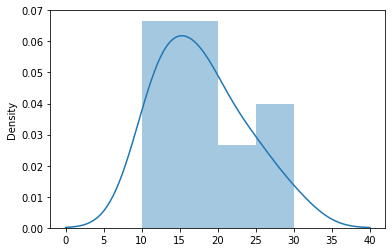

In [79]:
sns.distplot(data)

How to find the skewness without a graph ?

In [80]:
skew_val = data.skew()
skew_val

0.6701207748573313

How to find the kurtosis without a graph ?

Kurtosis measures the "tailedness" of a distribution. It tells you how outliers or extreme values are distributed in relation to a normal distribution.

In [81]:
kurt_val = data.kurtosis()
kurt_val

-0.21676434074598072

In [82]:
df12 =  pd.read_csv('data10.csv')
df12

,num1,num2,num3,num4,group
0,10,1,12,100,alpha
1,11,2,11,200,beta
2,12,3,10,300,delta
3,13,4,9,10,omega
4,14,5,8,5,gamma
5,15,6,7,4,alpha
6,16,7,6,30,beta
7,17,8,5,50,delta
8,18,9,4,20,gamma
9,19,10,3,43,omega


1) from the above data identify num1 is highly co-related which all the other columns ?

In [83]:
df12.corr()

,num1,num2,num3,num4
num1,1.000000,1.000000,-1.000000,-0.533409
num2,1.000000,1.000000,-1.000000,-0.533409
num3,-1.000000,-1.000000,1.000000,0.533409
num4,-0.533409,-0.533409,0.533409,1.000000


<AxesSubplot:>

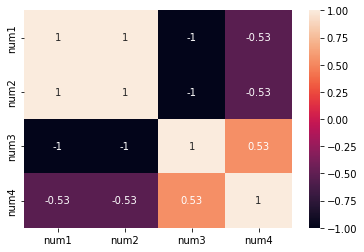

In [84]:
sns.heatmap(df12.corr(),annot = True)